# Assignment Activity 1: Making predictions with regression

## Section 1: Making Predictions with Regression

### Import Python Libraries and Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Load the data

In [2]:
reviews = pd.read_csv('turtle_reviews.csv')

### Sense-Check the DataFrame

In [3]:
# Print the first few rows of the DataFrame
print(reviews.head())

# Check the data types of columns
print(reviews.dtypes)

# Review the metadata (if available)
# Use 'metadata_turtle_games.txt' for reference

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

### Handle Missing Values

In [4]:
# Check for missing values
missing_values = reviews.isnull().sum()
print(missing_values)

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


### Description Statistics

In [5]:
# Create a summary of descriptive statistics
desc_stats = reviews.describe()
print(desc_stats)

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


### Remove Redundant Columns

In [6]:
# Remove redundant columns 'language' and 'platform'
reviews = reviews.drop(['language', 'platform'], axis=1)

### Rename Columns

In [7]:
# Rename columns for easier reference
reviews = reviews.rename(columns={'remuneration (k£)': 'salary', 'spending_score (1-100)': 'spending'})
reviews

,gender,age,salary,spending,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


### Save a Clean Copy of the DataFrame

In [8]:
# Save a clean copy of the DataFrame as a CSV file
reviews.to_csv('clean_turtle_reviews.csv', index=False)

### Perform Linear Regression

In [9]:
# Specify independent variables (age, salary, spending) and dependent variable (loyalty points)
X = reviews[['age', 'salary', 'spending']]
X = sm.add_constant(X)  # Add a constant term (intercept)
y = reviews['loyalty_points']

# Create the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit()

### Extract Regression Results

In [10]:
# Extract estimated parameters, standard errors, and predicted values
params = model.params
std_err = model.bse
predictions = model.predict(X)

### Generate a Regression Table

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:35:37   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2203.0598     52.361    -42.075      0.000   -2305.747   -2100.372
age           11.0607      0.869     12.730      0.000       9.357      12.765
salary        34.0084      0.497     68.427      0.000      33.034      34.983
spending      34.1832      0.452     75.638      0.000      33.297      35.070
==============================================================================
Omnibus:                       22.644   Durbin-Watson:                   3.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.110
Skew:                           0.227   Prob(JB):                     5.82e-06
Kurtosis:                       3.290   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot Linear Regression

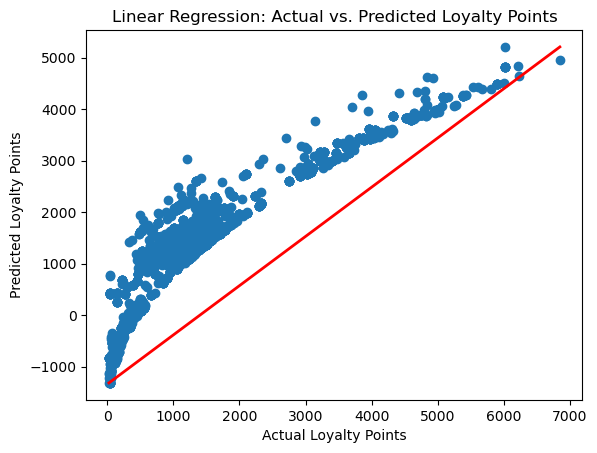

In [12]:
# Create a scatterplot with a regression line
plt.scatter(reviews['loyalty_points'], predictions)
plt.xlabel('Actual Loyalty Points')
plt.ylabel('Predicted Loyalty Points')
plt.title('Linear Regression: Actual vs. Predicted Loyalty Points')
plt.plot([min(reviews['loyalty_points']), max(reviews['loyalty_points'])], [min(predictions), max(predictions)], color='red', lw=2)
plt.show()

## Section 2: Making Predictions with Clustering

### Import Libraries and Load Data

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

df2 = pd.read_csv('clean_turtle_reviews.csv')

### Data Preparation

In [14]:
df2 = df2[['salary', 'spending']]

### Explore the data

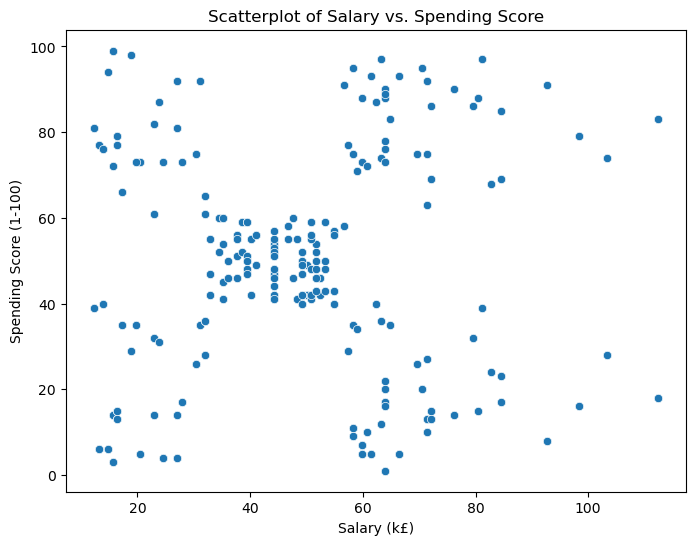

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='salary', y='spending')
plt.title('Scatterplot of Salary vs. Spending Score')
plt.xlabel('Salary (k£)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Elbow Method

C:\Users\McPhersonJ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\McPhersonJ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\McPhersonJ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\McPhersonJ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

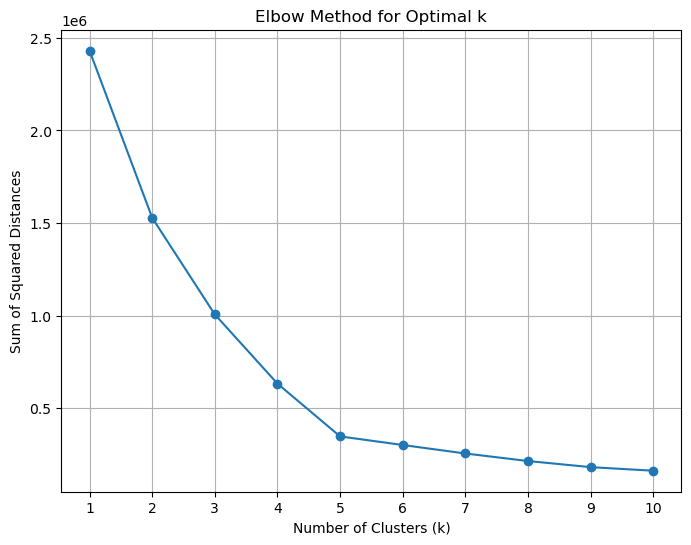

In [16]:
# Elbow Method to find optimal k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of k values to test
k_values = range(1, 11)
inertia_values = []

# Calculate the sum of squared distances for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df2)
    inertia_values.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Silhouette Method

C:\Users\McPhersonJ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\McPhersonJ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\McPhersonJ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\McPhersonJ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

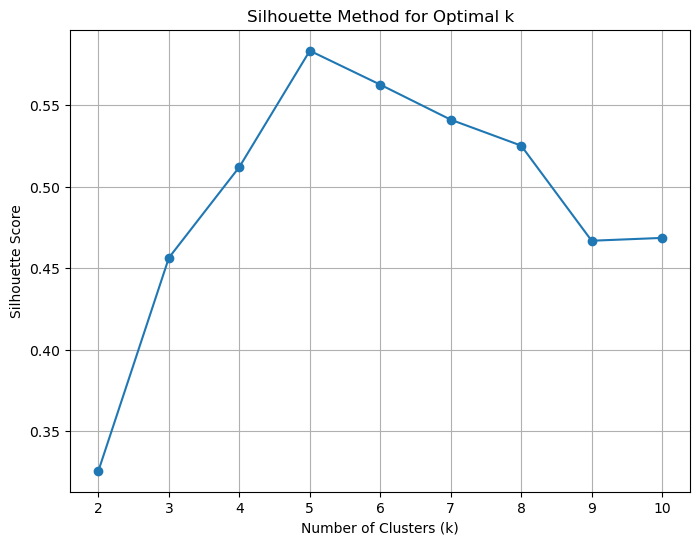

In [17]:
# Silhouette Method to find optimal k
from sklearn.metrics import silhouette_score

# Define a range of k values to test
k_values = range(2, 11)
silhouette_scores = []

# Calculate silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df2)
    silhouette_avg = silhouette_score(df2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Fit a Final K-Means Model based on selected k-value

In [18]:
k = 5  
kmeans = KMeans(n_clusters=k, random_state=0).fit(df2)

C:\Users\McPhersonJ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\McPhersonJ\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


### Cluster Sized and Interpretation

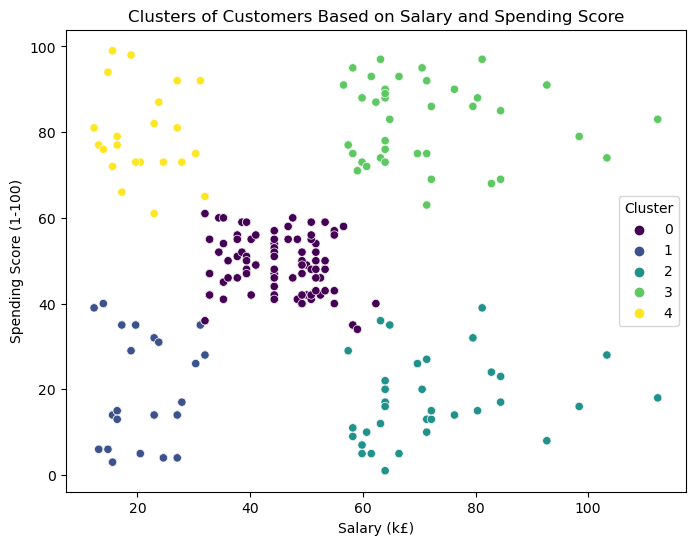

Cluster 0: Size 774
Cluster 1: Size 271
Cluster 2: Size 330
Cluster 3: Size 356
Cluster 4: Size 269


In [19]:
# Check the number of observations per predicted class
cluster_sizes = np.bincount(kmeans.labels_)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='salary', y='spending', hue=kmeans.labels_, palette='viridis', legend='full')
plt.title('Clusters of Customers Based on Salary and Spending Score')
plt.xlabel('Salary (k£)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Interpretation of the clusters and cluster sizes
for cluster_num, size in enumerate(cluster_sizes):
    print(f'Cluster {cluster_num}: Size {size}')

## Section 3: Analysing customer sentiments with reviews

### Import Libraries and Load Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [21]:
df2 = pd.read_csv('clean_turtle_reviews.csv')

### Data Preparation

In [22]:
df2.head()

,gender,age,salary,spending,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [23]:
df2 = df2[['review', 'summary']]

In [24]:
df2.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


### Data Preprocessing

In [25]:
# Convert text to lowercase and join elements in each column
df2['review'] = df2['review'].str.lower()
df2['summary'] = df2['summary'].str.lower()
df2['review'] = df2['review'].str.cat(df2['summary'], sep=' ')

In [26]:
# Remove punctuation from the 'review' column
df2['review'] = df2['review'].str.replace('[^\w\s]', '')

C:\Users\McPhersonJ\AppData\Local\Temp\ipykernel_6808\2591363164.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['review'] = df2['review'].str.replace('[^\w\s]', '')


In [27]:
# Drop duplicate rows
df2.drop_duplicates(inplace=True)

### Tokenisation and Word Clouds

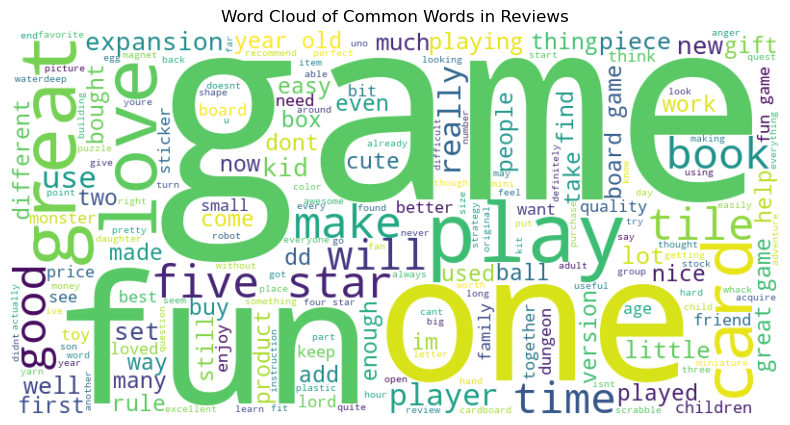

In [28]:
# Tokenize the 'review' column and create word cloud
tokens = word_tokenize(' '.join(df2['review']))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Reviews')
plt.show()

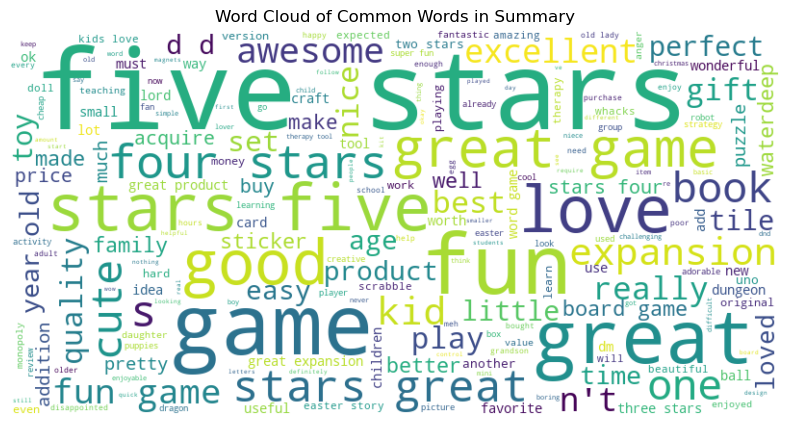

In [29]:
# Tokenize the 'summary' column and create word cloud
tokens = word_tokenize(' '.join(df2['summary']))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Summary')
plt.show()

### Top 15 words

In [30]:
# Combine 'review' and 'summary' columns and convert to lowercase
df2['review'] = (df2['review'] + ' ' + df2['summary']).str.lower()

# Tokenize the 'review' column
df2['tokens'] = df2['review'].apply(word_tokenize)

# Remove stopwords and non-alphanumeric characters
stop_words = set(stopwords.words('english'))
df2['filtered_tokens'] = df2['tokens'].apply(lambda tokens: [word for word in tokens if word.isalpha() and word not in stop_words])

# Create a list of all tokens
all_tokens = [word for tokens in df2['filtered_tokens'] for word in tokens]

# Calculate word frequencies
word_freq = FreqDist(all_tokens)

# Get the top 15 words
top_15_words = word_freq.most_common(15)

# Convert to DataFrame for easy display
top_15_words_df = pd.DataFrame(top_15_words, columns=['Word', 'Frequency'])

# Display the top 15 words
print(top_15_words_df)


      Word  Frequency
0     game       2308
1    great       1169
2      fun        987
3    stars        891
4     five        704
5      one        607
6     play        554
7     like        522
8     love        509
9     good        473
10  really        379
11    book        359
12     get        348
13   tiles        337
14    kids        334


### Frequency Distribution and Sentiment Polarity

In [31]:
# Frequency distribution
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
fdist = FreqDist(tokens)
fdist.most_common(15)

# Calculate sentiment polarity
sid = SentimentIntensityAnalyzer()
sentiment_scores = df2['review'].apply(lambda x: sid.polarity_scores(x))
df2['polarity'] = sentiment_scores.apply(lambda x: x['compound'])


### Review Sentiment Analysis

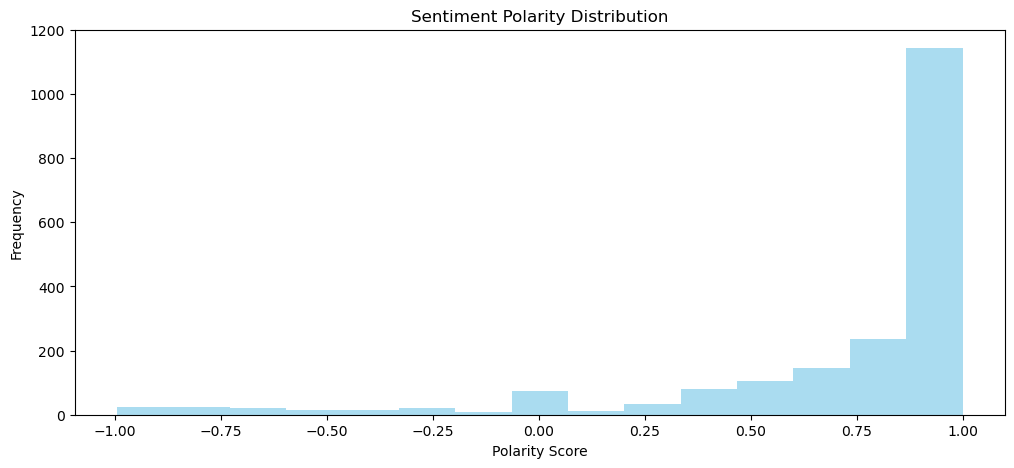

In [35]:
# Plot histograms of polarity
plt.figure(figsize=(12, 5))
plt.hist(df2['polarity'], bins=15, alpha=0.7, color='skyblue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()